
**Script for data cleaning**

In [ ]:
import os
from PIL import Image
from tqdm import tqdm


directoryName = "/content/drive/MyDrive/CCMT_FInal Dataset";

if os.path.exists(directoryName):
    delete_corrupted_images(directoryName)
    print("Operation complete.")
else:
    print("Directory not found.")

def delete_corrupted_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            try:
                # Attempt to open the image file
                with Image.open(file_path) as img:
                    pass  # Do nothing if the file is successfully opened
            except (IOError, SyntaxError) as e:
                print(f"Corrupted file: {file_path}. Deleting...")
                os.remove(file_path)





Directory not found.


In [ ]:
!python train.py -r

In [ ]:
!python /content/drive/MyDrive/DiseaseClassifier/inference.py -p "/content/drive/MyDrive/CCMT_FInal Dataset/Maize_healthy/healthy37_.jpg"

Image path: /content/drive/MyDrive/CCMT_FInal Dataset/Maize_healthy/healthy37_.jpg
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Disease Maize_healthy Confidence Level 77.28632092475891%



In [ ]:
#tpu support
!pip install torch-xla
!pip install torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: uritemplate
    Found existing installation: uritemplate 4.1.1
    Uninstalling uritemplate-4.1.1:
      Successfully uninstalled uritemplate-4.1.1
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [ ]:
# tpu support
import torch_xla
import torch_xla.core.xla_model as xm

ModuleNotFoundError: ignored

In [ ]:
# for using tpu only
DEVICE = xm.xla_device()

NameError: ignored

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# defines the number of processes that loads the data, idealy set according to the number of the cores available in cpu
NUM_WORKERS = min(4, os.cpu_count()) if DEVICE == "cpu" else 2
BATCH_SIZE = 128;
IMAGE_SIZE = 224
PATH = "/content/drive/MyDrive/CCMT_FInal Dataset";
TRAIN_RATIO = 0.8
layersToTrain = 10;


In [ ]:
print(full_dataset.classes)

['Cashew_anthracnose', 'Cashew_gumosis', 'Cashew_healthy', 'Cashew_leaf miner', 'Cashew_red rust', 'Cassava_bacterial blight', 'Cassava_brown spot', 'Cassava_green mite', 'Cassava_healthy', 'Cassava_mosaic', 'Maize_fall armyworm', 'Maize_grasshoper', 'Maize_healthy', 'Maize_leaf beetle', 'Maize_leaf blight', 'Maize_leaf spot', 'Maize_streak virus', 'Tomato_healthy', 'Tomato_leaf blight', 'Tomato_leaf curl', 'Tomato_septoria leaf spot', 'Tomato_verticulium wilt']


In [ ]:
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
    ])

full_dataset = datasets.ImageFolder(root=PATH, transform=transform)


train_size = int(TRAIN_RATIO * len(full_dataset))
test_size = len(full_dataset) - train_size

# Split the dataset into training and testing sets
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers = NUM_WORKERS)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers = NUM_WORKERS)


In [ ]:
critValidationLoss = checkpoint["clsfValidationLoss"]
critTrainingLoss = checkpoint["critTrainingLoss"]
clsfValidationLoss = checkpoint["clsfValidationLoss"]
clsfTrainingLoss = checkpoint["clsfTrainingLoss"]
# clsfValidationBatch = checkpoint["clsfValidationBatch"]
epochIters   = checkpoint["epochIters"]
lossCriterionList = checkpoint["lossCriterionList"]
lossMisclassificationList = checkpoint["lossMisclassificationList"]
bIters = checkpoint["bIters"]

In [ ]:
num_classes = len(full_dataset.classes)

In [ ]:
resnet = models.resnet50(pretrained=True)

resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s]


In [ ]:
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#loading model states from a checkpoint
resnet = resnet.to(DEVICE)
checkpoint = torch.load('/content/drive/MyDrive/cropsClassifierCheckpoints/checkpoint_11_epoch_lr=0.000001_2.pth',map_location=torch.device(DEVICE
                                                                                                                           ));
resnet.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


In [ ]:
layersForTraining = list(resnet.children())[-layersToTrain:]

# Set requires_grad to True for the parameters of the identified layers
for layer in layersForTraining:
    for param in layer.parameters():
        param.requires_grad = True


In [ ]:
print(len(layersForTraining))

10


In [ ]:
total_parameters = len(list(resnet.parameters()))
total_layers = len(list(resnet.children()))
print(total_parameters, total_layers)

161 10


In [ ]:
def count_non_frozen_layers(model):
    total_layers = 0
    non_frozen_layers = 0

    for param in model.parameters():
        total_layers += 1
        if param.requires_grad:
            non_frozen_layers += 1

    return non_frozen_layers, total_layers


num_non_frozen, total_layers = count_non_frozen_layers(resnet)

print(f"Total layers: {total_layers}")
print(f"Non-frozen layers: {num_non_frozen}")


Total layers: 161
Non-frozen layers: 161


In [ ]:
# these structures maintain the stats for whole epoch

critValidationLoss = [];
critTrainingLoss = [];

# for misclassification stats

clsfValidationLoss = [];
clsfTrainingLoss = [];

clsfValidationBatch = []

epochIters = []
print(f'device {DEVICE} , num_workers {NUM_WORKERS}' )

device cuda , num_workers 2


In [ ]:
# these lists maintain the stats for a batch

lossCriterionList = [0];
lossMisclassificationList = [0]
bIters = [0];

In [ ]:
bIters[-1]

0

In [ ]:
def calculateMisclassificationPercentage(logits, labels):
    """
    Calculate the percentage of misclassification given logits and truth labels.

    Parameters:
        logits (torch.Tensor): The predicted logits.
        labels (torch.Tensor): The ground truth labels.

    Returns:
        float: The percentage of misclassification.
    """
    _, predicted_indices = torch.max(logits, 1)
    _, label_indices = torch.max(labels, 1)

    correct = (predicted_indices == label_indices).sum().item()
    total = label_indices.size(0)

    return ((1 - (correct / total)) * 100)


In [ ]:
checkpoint_dir = '/content/drive/MyDrive/cropsClassifierCheckpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

Criterion Loss : 0.4227258861064911 Classification Loss : 16.40625 
Criterion Loss : 0.4281081557273865 Classification Loss : 12.5 
Criterion Loss : 0.4155316650867462 Classification Loss : 13.28125 
Criterion Loss : 0.4100833535194397 Classification Loss : 12.5 
Criterion Loss : 0.4771312475204468 Classification Loss : 16.40625 
Criterion Loss : 0.3535844683647156 Classification Loss : 11.71875 
Criterion Loss : 0.3607342839241028 Classification Loss : 11.71875 
Criterion Loss : 0.4587256908416748 Classification Loss : 14.84375 
Criterion Loss : 0.4126465916633606 Classification Loss : 10.15625 
Criterion Loss : 0.4611843228340149 Classification Loss : 15.625 
Criterion Loss : 0.3992947041988373 Classification Loss : 14.84375 
Criterion Loss : 0.4778175354003906 Classification Loss : 17.1875 
Criterion Loss : 0.5181800127029419 Classification Loss : 17.96875 
Criterion Loss : 0.4610219895839691 Classification Loss : 17.96875 
Criterion Loss : 0.4611828029155731 Classification Loss : 1

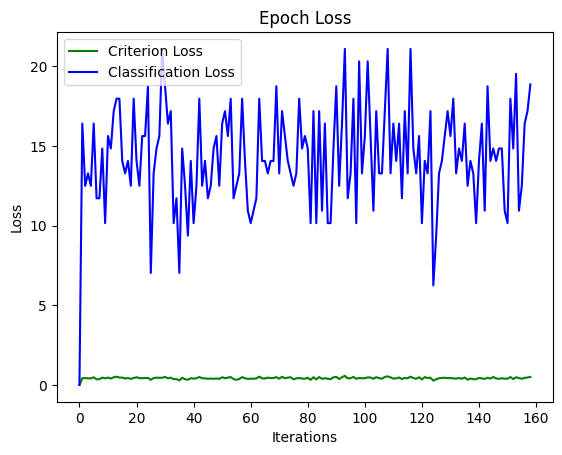

KeyboardInterrupt: ignored

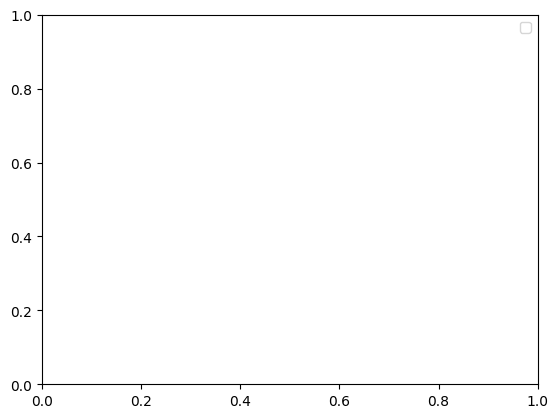

In [ ]:
# Training loop

num_epochs = 10
resnet.to(DEVICE)

for epoch in range(num_epochs):

  # checkpoint for saving the model state for resue in case of interruptions
    checkpoint = {
      'epoch': epoch + 1,
      'model_state_dict': resnet.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'critTrainingLoss': critTrainingLoss,
      'clsfTrainingLoss': clsfTrainingLoss,
      'critValidationLoss': critValidationLoss,
      'clsfValidationLoss': clsfValidationLoss,
      'epochIters': epochIters,
      'bIters': bIters,
      'lossCriterionList': lossCriterionList,
      'lossMisclassificationList': lossMisclassificationList,
      }

    epochLoss = 0;
    batchLoss = 0;

    #switching to the training mode, gradients will be kept in record

    resnet.train()

    for batch , (inputs, labels) in enumerate(train_loader):

        inputs = inputs.to(DEVICE)
        # putting labels on accelator and converting them to one hot
        labels = torch.eye(num_classes)[labels].to(DEVICE)
        # [1,3,2,4]

        #  [[0,1,0,0],[0,0,0,1],[0,0,1,0],[0,0,0,]]

        optimizer.zero_grad()
        outputs = resnet(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        # saving batch loss
        batchLoss = loss.item()
        epochLoss  = epochLoss + batchLoss;
        lossCriterionList.append(batchLoss);
        bIters.append(bIters[-1]+1);

        #calculating the number of correctly classified examples
        lossMisclassificationList.append(calculateMisclassificationPercentage(outputs,labels));

        print(f'Criterion Loss : {batchLoss} Classification Loss : {lossMisclassificationList[-1]} ')


    # plotting performance over entire epoch
    plt.plot(bIters, lossCriterionList, color="green", label="Criterion Loss")
    plt.plot(bIters, lossMisclassificationList, color="blue", label="Classification Loss")
    plt.title("Epoch Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    plt.legend()

    #calculating the average loss for the whole epoch
    epochLoss = epochLoss/(batch+1);
    # saving the criterion loss
    critTrainingLoss.append(epochLoss);
    #saving the average misclassification loss over whole batch for current epoch
    clsfTrainingLoss.append(sum(lossMisclassificationList))
    epochIters.append(epoch+1);

    #switching to the evaluation mode no gradients graphs computed
    resnet.eval()
    with torch.no_grad():
      # making this list empty after one epcoh
        clsfValidationBatch=[]
        evalLoss = 0;
        for batchIdx ,(inputs, labels) in enumerate(val_loader):

            inputs = inputs.to(DEVICE)
            labels = torch.eye(num_classes)[labels].to(DEVICE)
            outputs = resnet(inputs)

            # calculating the criterion loss can miscalssfication loss
            loss = criterion(outputs, labels)

            evalLoss = evalLoss + loss.item();
            clsfValidationBatch.append(calculateMisclassificationPercentage(outputs,labels))



        evalLoss = evalLoss / (batchIdx+1)
        critValidationLoss.append(evalLoss);
        clsfValidationLoss.append(sum(clsfValidationBatch)/(batchIdx+1));


        # shows how well model performed based on the criterion loss
        plt.title("Criterion Loss")
        plt.plot(epochIters, critTrainingLoss, color="blue", label="Training Loss")
        plt.plot(epochIters, critValidationLoss, color="red", label="Validation Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # shows how well model performed based on the misclassfication
        plt.title("Misclassification Loss")
        plt.plot(epochIters, clsfTrainingLoss, color="blue", label="Training Loss")
        plt.plot(epochIters, clsfValidationLoss, color="red", label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Mislcassifications")
        plt.legend()
        plt.show()

        print(f'Epoch {epoch+1}/{num_epochs},Training Loss {critTrainingLoss[-1]:.4f}, Validation Loss {critValidationLoss[-1]:.4f}\nTraining Misclass {clsfTrainingLoss[-1]:.4f}, Validation Misclass {clsfValidationLoss[-1]:.4f}')

    # saving checkpoint
    currentTime = datetime.datetime.now()

    timeStamp = currentTime.strftime("%Y%m%d_%H%M%S")
    checkpoint_filename = f'chkpnt_{timeStamp}_{clsfValidationLoss[-1]}.pth'
    checkpoint_path = os.path.join(checkpoint_dir, checkpoint_filename)
    torch.save(checkpoint, checkpoint_path)




In [ ]:
checkpoint_filename = f'checkpointLoss{80}.pth'
checkpoint_path = os.path.join(checkpoint_dir, checkpoint_filename)
torch.save(checkpoint, checkpoint_path)


In [ ]:
_,indices = torch.max(outputs,1)
_,truth = torch.max(labels,1)

correct = (indices == truth).sum().item()
total = indices.size(0)
print(correct/total)

0.8203125


In [ ]:
print(loss.tolist())

0.4767035245895386


In [ ]:
print(labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')


In [ ]:
print(evalLoss)

NameError: ignored

In [ ]:
print(trainingLoss,validationLoss)


NameError: ignored

In [ ]:
# Save the fine-tuned model
torch.save(resnet.state_dict(), './resnetAcc=98.79.pth')

In [ ]:
#testing on some images
image = Image.open("/content/drive/MyDrive/CCMT_FInal Dataset/Maize_healthy/healthy37_.jpg")

transformToTorch = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

tensorImage = transformToTorch(image).to(DEVICE, dtype=torch.float32)




In [ ]:
# taking a prediction from the resnet in form of the class name
tensorImage = tensorImage.to(DEVICE,dtype=torch.float32); # shifting it to the gpu if available and converting type to float 32
batchImage = tensorImage.unsqueeze(0); # adding the dimension for batch;
resnet.eval()
output = resnet(batchImage)

In [ ]:
print(output)

tensor([[ 0.1416, -0.9505,  1.6924, -1.3657, -0.8808, -0.7438, -1.0403, -0.5629,
          1.0599, -1.4482,  0.7557, -0.3271,  5.2744,  2.4739,  0.7786,  3.9320,
          1.9388, -1.5435, -2.6599, -1.0092, -2.4879, -1.9603]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
tens = torch.zeros(1,22).to(DEVICE);
tens[0,12] = 1;
tens


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]], device='cuda:0')

In [ ]:
x = calculateMisclassificationPercentage(output,tens)
print(x)

tensor([12], device='cuda:0')
0.0


In [ ]:
sftmax = torch.nn.Softmax(dim=1)
probs = sftmax(output).data
print(probs)


tensor([[4.0685e-03, 1.3651e-03, 1.9184e-02, 9.0124e-04, 1.4636e-03, 1.6786e-03,
         1.2479e-03, 2.0113e-03, 1.0192e-02, 8.2988e-04, 7.5188e-03, 2.5463e-03,
         6.8962e-01, 4.1915e-02, 7.6927e-03, 1.8014e-01, 2.4546e-02, 7.5444e-04,
         2.4705e-04, 1.2872e-03, 2.9342e-04, 4.9729e-04]], device='cuda:0')


In [ ]:
# print(torch.sum(output))
torch.max(output,1)
# print(prediction.data)

torch.return_types.max(
values=tensor([5.2744], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([12], device='cuda:0'))

In [ ]:
print(predictions.tolist())

NameError: ignored

In [ ]:
print(full_dataset.classes[prediction.data[0]])

NameError: ignored

In [ ]:
probs = torch.nn.functional.softmax(outputs,dim=1)
# _, prediction = torch.max(probs,1)
# print(prediction)

In [ ]:
print(probs.shape)

torch.Size([128, 22])


In [ ]:
max_prob_index = torch.argmax(probs,dim=1)

In [ ]:
print(max_prob_index)

tensor([20,  5,  5, 20,  5,  5,  5,  5, 20,  5,  4, 15, 20, 20, 20,  5,  5, 20,
        20, 20,  4,  0, 20,  5,  4,  5,  5, 20, 20,  5, 20,  8, 20,  0,  5,  3,
         5,  4, 20,  4, 20,  4, 20, 20,  5,  5,  5,  4, 20,  6,  5,  5,  0, 20,
         0, 20, 20, 20,  5, 20,  0, 20, 20,  5, 20,  0, 20,  5,  5, 20, 20,  5,
         5,  5,  5, 20,  2, 20,  5,  5,  4,  0,  5,  5, 20, 20, 20,  5,  5,  5,
        20,  0,  5, 20,  5, 20,  5, 20, 20, 20,  5,  5,  4,  6, 20,  5,  4,  5,
         5, 20,  5,  5,  5, 20, 20, 20,  5,  0,  5,  5,  5,  5,  5,  5, 20,  5,
         5,  5], device='cuda:0')


In [ ]:
full_dataset.classes[max_prob_index]

IndexError: ignored